In [1]:
print("hello")

hello


In [2]:
pip install yfinance


In [3]:
import yfinance as yf

In [4]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [5]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-02-28,4.665436,4.712093,4.612327,4.616050,313908211
2005-03-01,4.617538,4.709115,4.516780,4.697700,373844027
2005-03-02,4.595699,4.657495,4.575349,4.614809,292512314
2005-03-03,4.641115,4.659479,4.574109,4.619276,305484756
2005-03-04,4.613568,4.647072,4.592970,4.633422,271979640


In [7]:
google_data.shape

(5032, 5)

In [8]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,49.947342,50.453491,49.427989,49.926966,1.050237e+08
std,47.911998,48.414331,47.411053,47.884356,1.350179e+08
min,4.342810,4.427437,4.282752,4.350503,1.584340e+05
25%,13.441391,13.576088,13.308432,13.471917,2.627599e+07
50%,28.497088,28.712966,28.196920,28.528288,4.916227e+07
75%,67.193811,67.748946,66.666954,67.202284,1.291563e+08
max,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [9]:
google_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-02-28 to 2025-02-26
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5032 non-null   float64
 1   (High, GOOG)    5032 non-null   float64
 2   (Low, GOOG)     5032 non-null   float64
 3   (Open, GOOG)    5032 non-null   float64
 4   (Volume, GOOG)  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [10]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1000x500 with 0 Axes>

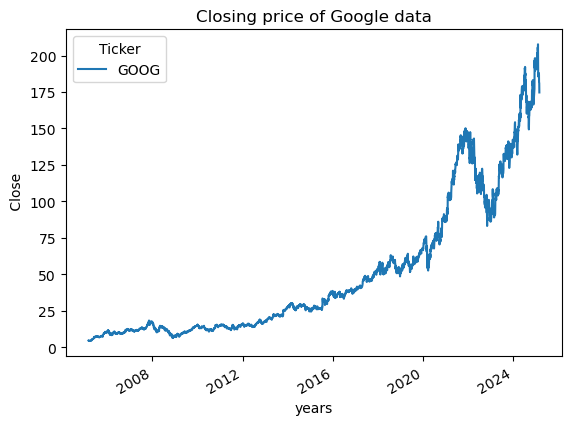

In [12]:
plt.figure(figsize = (10,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel(" Close")
plt.title("Closing price of Google data")

In [13]:
def plot_graph(figsize, values ,column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"(column_name) of Google data")

In [14]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

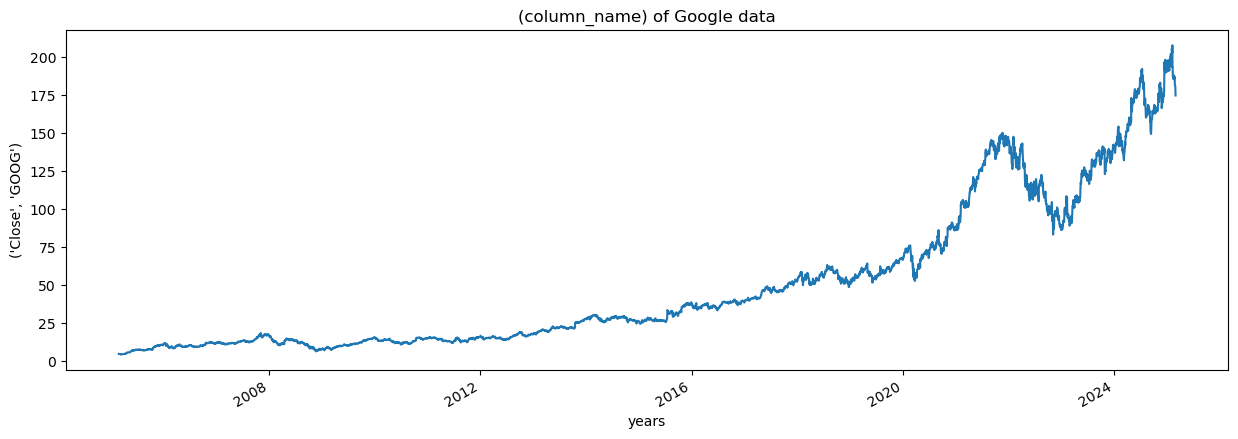

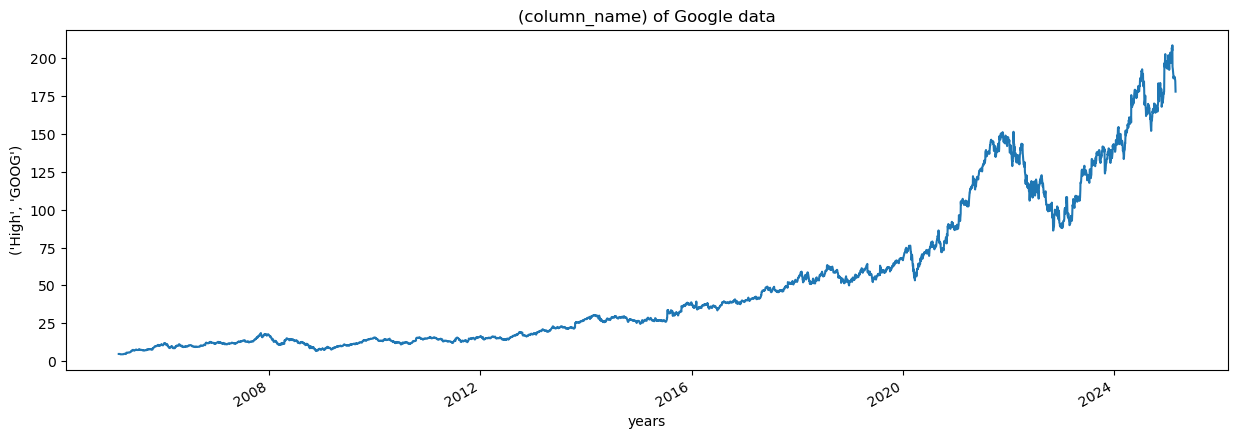

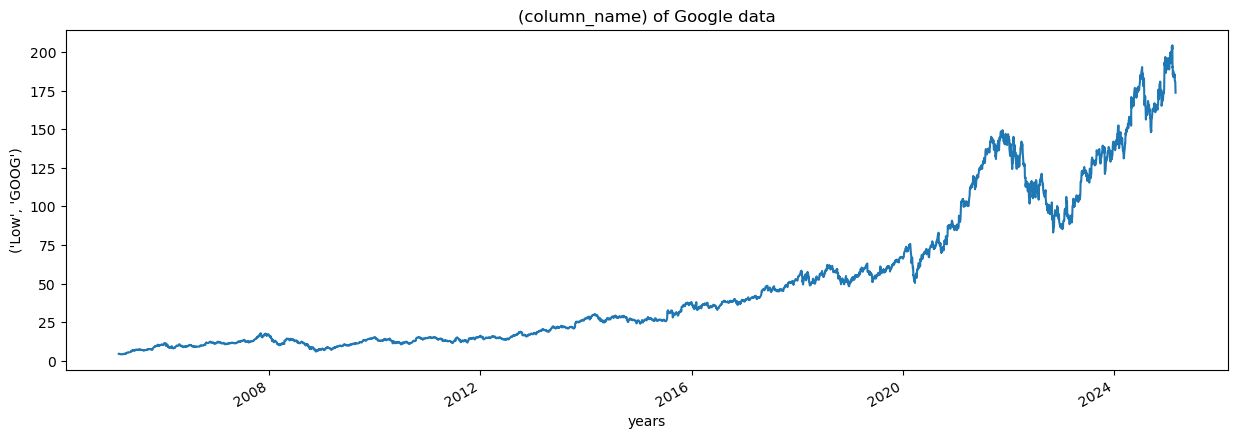

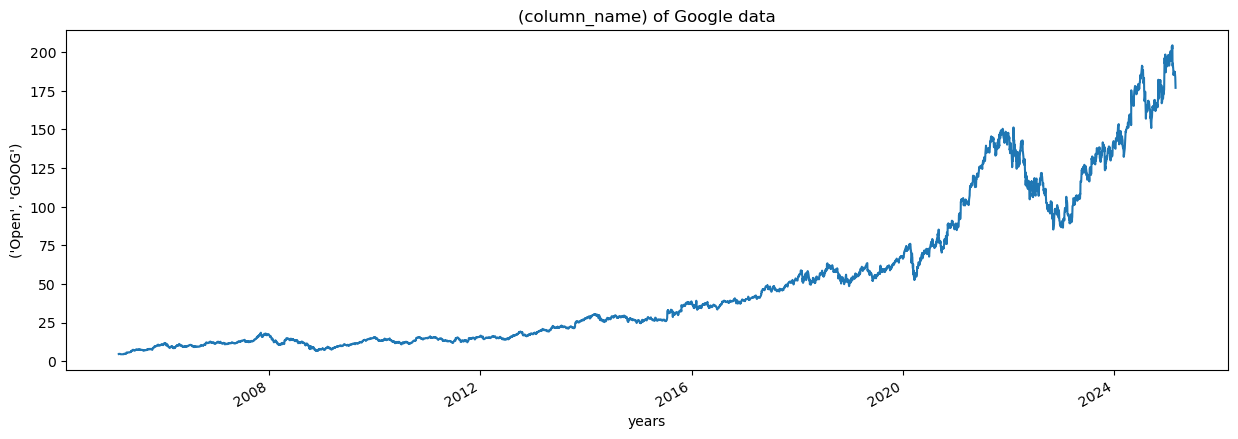

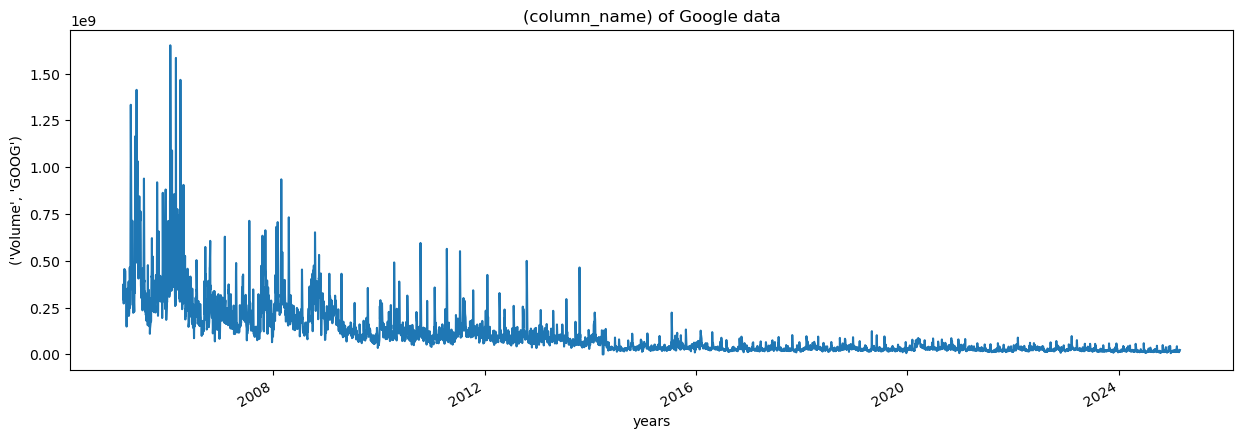

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [16]:
#formula for calculating moving avg

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[0:5])/5)

30.0


In [18]:
import pandas as pd

In [19]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [20]:
data.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [21]:
data["MA"] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [22]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 214
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [23]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [24]:
google_data['MA_for_250_days']

Date
2005-02-28           NaN
2005-03-01           NaN
2005-03-02           NaN
2005-03-03           NaN
2005-03-04           NaN
                 ...    
2025-02-20    171.581494
2025-02-21    171.728615
2025-02-24    171.874296
2025-02-25    172.030763
2025-02-26    172.171169
Name: MA_for_250_days, Length: 5032, dtype: float64

In [25]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-02-16         NaN
2006-02-17         NaN
2006-02-21         NaN
2006-02-22         NaN
2006-02-23    7.686959
Name: MA_for_250_days, dtype: float64

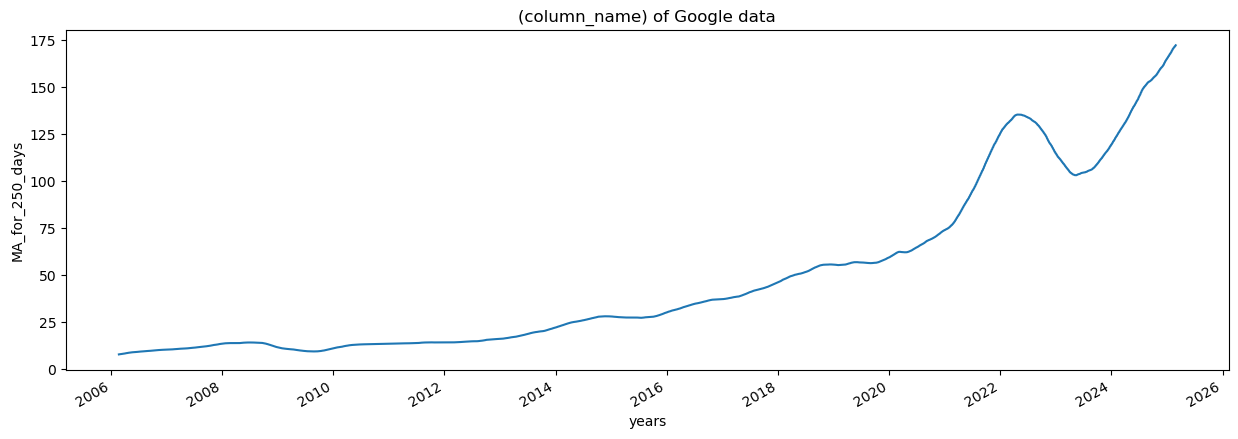

In [26]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

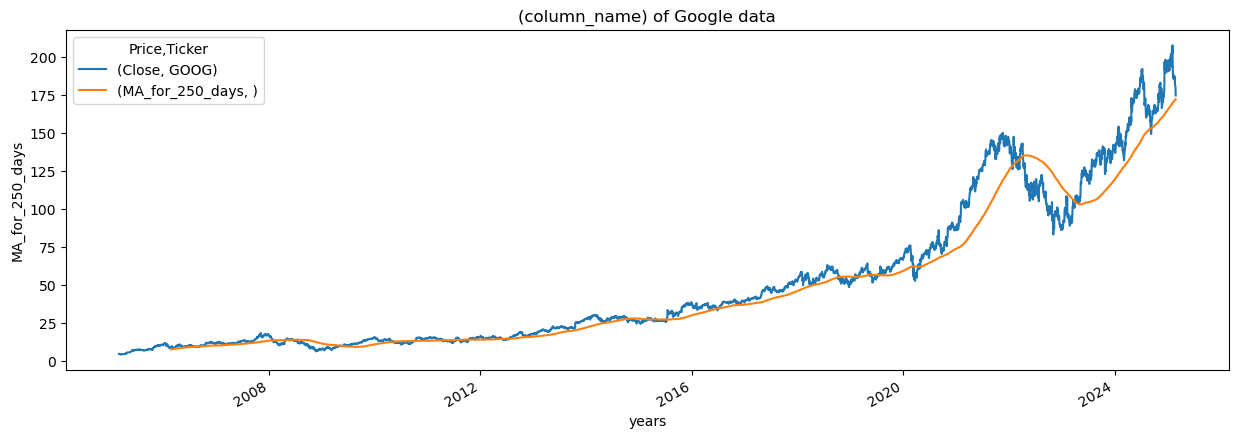

In [27]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

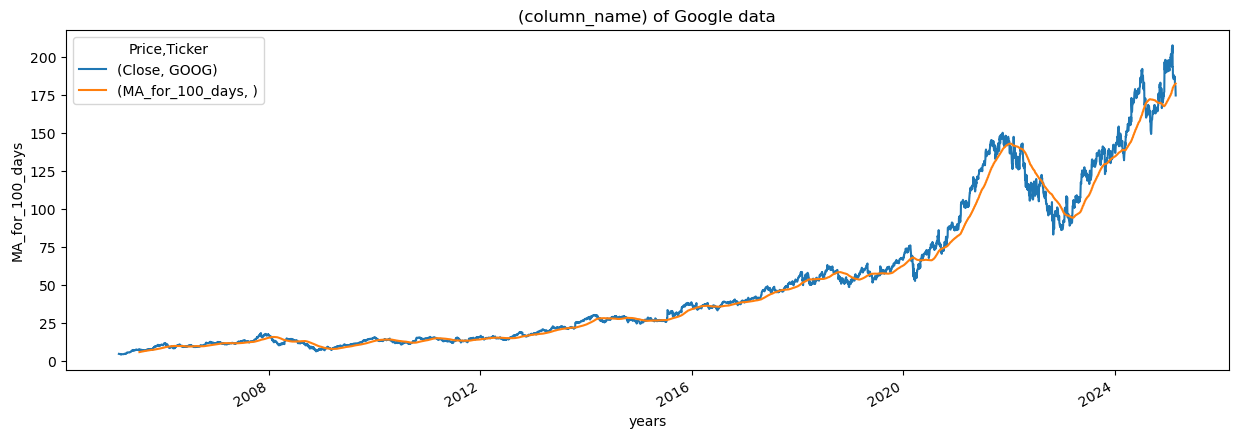

In [28]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

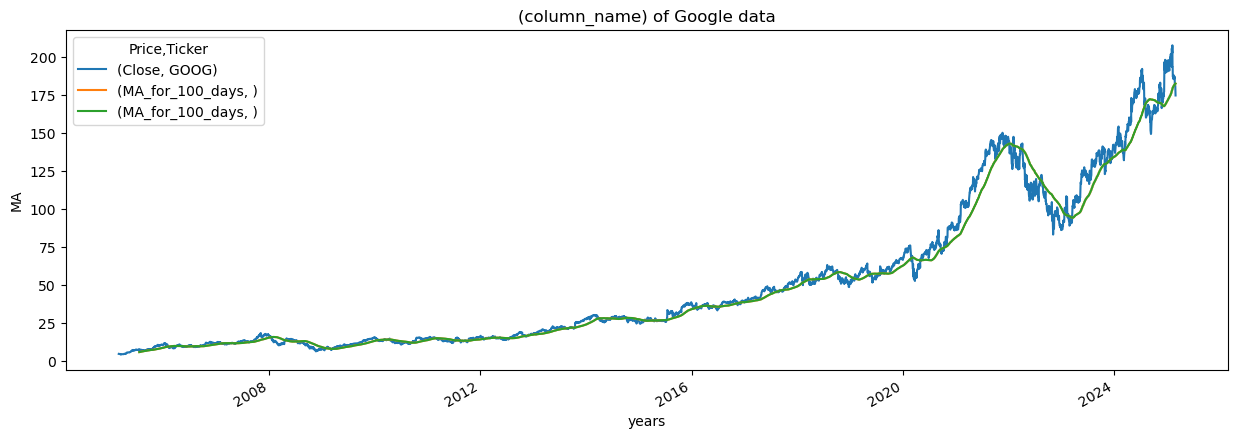

In [29]:
plot_graph((15,5), google_data[['Close','MA_for_100_days','MA_for_100_days']], 'MA')

In [30]:
#percentage_change

In [31]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data['percentage_change_cp']

Date
2005-02-28         NaN
2005-03-01   -0.010267
2005-03-02   -0.004730
2005-03-03    0.009882
2005-03-04   -0.005935
                ...   
2025-02-20   -0.002619
2025-02-21   -0.027111
2025-02-24   -0.002148
2025-02-25   -0.021083
2025-02-26   -0.015053
Name: percentage_change_cp, Length: 5032, dtype: float64

In [32]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-02-28,4.665436,NaN
2005-03-01,4.617538,NaN
2005-03-02,4.595699,NaN
2005-03-03,4.641115,NaN
2005-03-04,4.613568,NaN


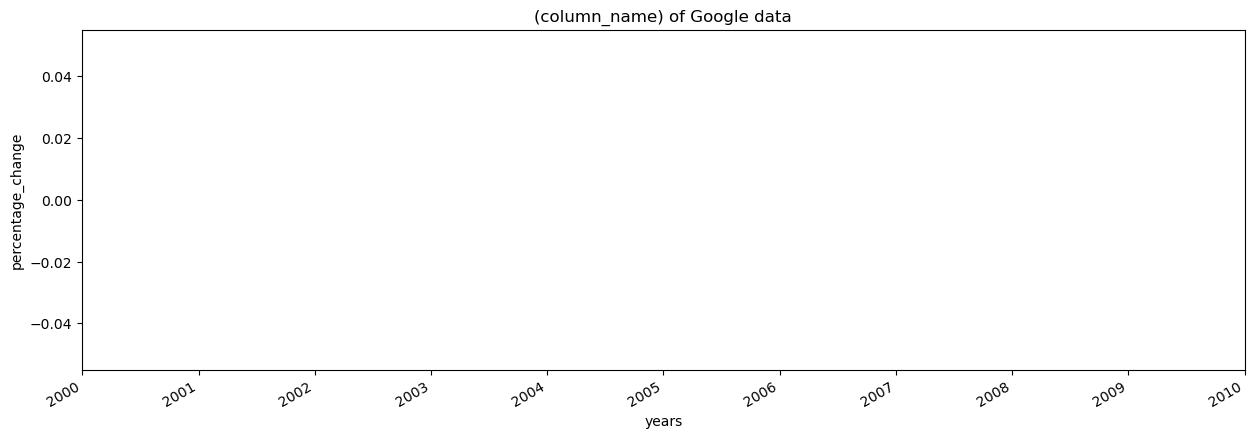

In [33]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [34]:
Close_price = google_data[['Close']]

In [35]:
max(Close_price.values),min(Close_price.values)

(array([207.71000671]), array([4.34281015]))

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)
scaled_data

array([[0.00158642],
       [0.0013509 ],
       [0.00124351],
       ...,
       [0.86959547],
       [0.85081167],
       [0.83768272]])

In [37]:
#data preprocessing

In [38]:
len(scaled_data)

5032

In [39]:

# taking 1 to 100 data for 101 data

In [40]:
x_data = []
y_data = []
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)



In [41]:
x_data[0],y_data[0]

(array([[1.58642160e-03],
        [1.35089780e-03],
        [1.24351007e-03],
        [1.46682731e-03],
        [1.33137574e-03],
        [1.68648915e-03],
        [1.24594857e-03],
        [7.76124897e-04],
        [6.08942364e-04],
        [3.42909190e-04],
        [0.00000000e+00],
        [4.41757487e-04],
        [7.44398623e-05],
        [5.24736784e-04],
        [6.16260205e-04],
        [7.18770939e-04],
        [4.40535893e-04],
        [4.86907228e-04],
        [5.19857442e-04],
        [7.84664332e-04],
        [5.58906247e-04],
        [6.66296323e-04],
        [6.73616508e-04],
        [6.16260205e-04],
        [1.25693588e-03],
        [1.65720372e-03],
        [1.73652292e-03],
        [2.29054983e-03],
        [2.08187530e-03],
        [2.22587568e-03],
        [2.31496060e-03],
        [2.18926772e-03],
        [2.00865703e-03],
        [1.22154248e-03],
        [1.46195031e-03],
        [2.00255610e-03],
        [2.82017533e-03],
        [3.56701714e-03],
        [4.9

In [42]:
int(len(x_data)*0.7)

3452

In [43]:
5031-100-int(len(x_data)*0.7)

1479

In [44]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[:splitting_len]
y_test = y_data[:splitting_len]

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(3452, 100, 1)
(3452, 1)


In [46]:
#building neural network model 

In [47]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [50]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Madha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

model = Sequential([
    Input(shape=(x_train.shape[1], 1)),  # Define input shape separately
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])


In [67]:
model.fit(x_train,y_train, batch_size=1, epochs =2)

ValueError: You must call `compile()` before using the model.

In [69]:
# Compile the model before training
model.compile(optimizer='adam', loss='mean_squared_error')

# Now fit the model
model.fit(x_train, y_train, batch_size=1, epochs=2)


Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 86s 24ms/step - loss: 2.6912e-04 
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 86s 25ms/step - loss: 6.9017e-05 


In [70]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [73]:
predictions = model.predict(x_test)

108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step


In [75]:
predictions

array([[0.01281593],
       [0.01318823],
       [0.01292444],
       ...,
       [0.27038163],
       [0.27238894],
       [0.27287233]], dtype=float32)

In [77]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 6.949149 ],
       [ 7.0248637],
       [ 6.971218 ],
       ...,
       [59.329563 ],
       [59.737785 ],
       [59.83609  ]], dtype=float32)

In [79]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 7.7911973 ],
       [ 7.50480318],
       [ 7.34224939],
       ...,
       [60.53250122],
       [60.1414032 ],
       [59.97650146]])

In [81]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [83]:
rmse

0.8325886560466549

In [85]:
ploting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

ValueError: Length of values (3452) does not match length of index (1480)

In [87]:
print("Length of inv_y_test:", len(inv_y_test.reshape(-1)))
print("Length of inv_predictions:", len(inv_predictions.reshape(-1)))
print("Length of index:", len(google_data.index[splitting_len+100:]))


Length of inv_y_test: 3452
Length of inv_predictions: 3452
Length of index: 1480


In [89]:
min_length = min(len(inv_y_test), len(inv_predictions), len(google_data.index[splitting_len+100:]))

ploting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.reshape(-1)[:min_length],
        'predictions': inv_predictions.reshape(-1)[:min_length]
    },
    index = google_data.index[splitting_len+100:][:min_length]
)


<Figure size 640x480 with 0 Axes>

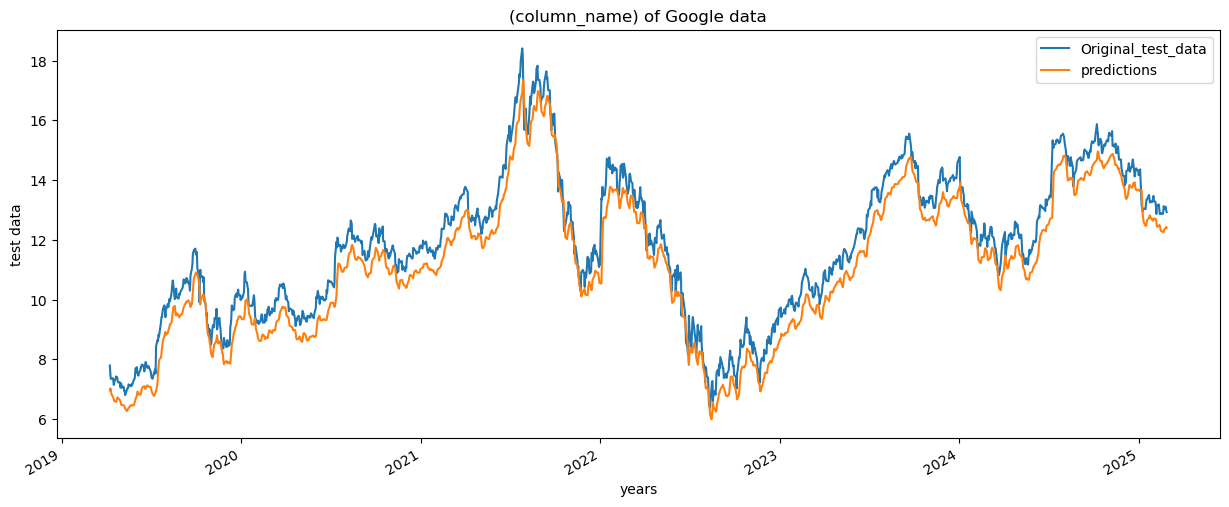

In [91]:
plot_graph((15,6) , ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

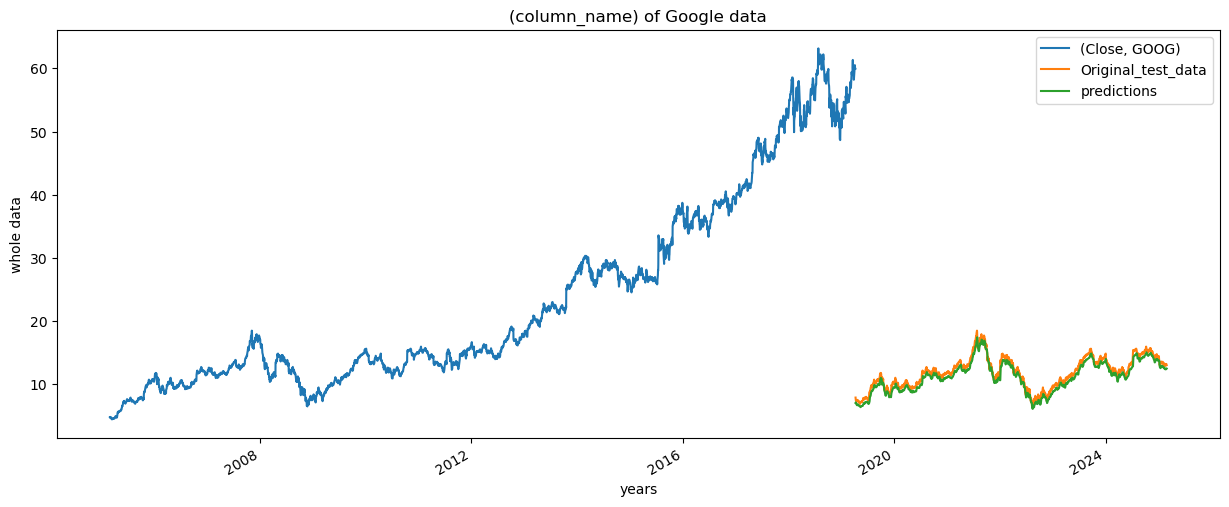

In [95]:
plot_graph((15,6) , pd.concat([Close_price[:splitting_len+100],ploting_data],axis =0), 'whole data')

In [97]:
model.save("Latest_stock_price_model.keras")